In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [2]:
data = pd.read_csv("Preprocessed_data.csv")
data


,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [3]:
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                test_size=0.2,
                                                random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [5]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [6]:
from sklearn.ensemble import RandomForestClassifier
RFtree = RandomForestClassifier()
RFtree

RandomForestClassifier()

In [8]:
RFtree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# create a dictnory of parameters 

param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'], # 2
    'max_depth': [3, 5, 10],     # 3
    'max_features': ['sqrt', 'log2'], # 2
    'random_state': [0, 42] # 2
}

# RF story: will select not only sample but also features
# will select the feature sqrt or log2
# How many combinatios
# 3*2*2*2= 24*100  +  200*24= 7200

In [13]:
grid_search = GridSearchCV(RFtree,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

In [14]:
import time

start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The completion time is:",(end-start))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The completion time is: 300.7695128917694


In [15]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

In [16]:
grid_search.best_score_

0.8174051144445882

In [17]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 42}

In [18]:
accuracy_list=cross_val_score(grid_search.best_estimator_,
                X_train,
                y_train,
                cv=5,
                scoring='accuracy')
accuracy_list

array([0.82102273, 0.80796586, 0.81507824, 0.82361309, 0.81934566])

In [19]:
accuracy_list.mean()

0.8174051144445882

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',
                            max_depth=10,
                            max_features='sqrt',
                            n_estimators=200,
                            random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

In [23]:
y_pred_rf=rf.predict(X_test)

In [24]:
acc_rf= round(accuracy_score(y_test,y_pred_rf)*100,2)
f1_rf=round(f1_score(y_test,y_pred_rf),2)
precision_rf=round(precision_score(y_test,y_pred_rf),2)
recall_rf=round(recall_score(y_test,y_pred_rf),2)
print("accuray is:",acc_rf)
print("F1 is:",f1_rf)
print("Precision is:",precision_rf)
print("Recall is:",recall_rf)

accuray is: 83.04
F1 is: 0.88
Precision is: 0.85
Recall is: 0.91


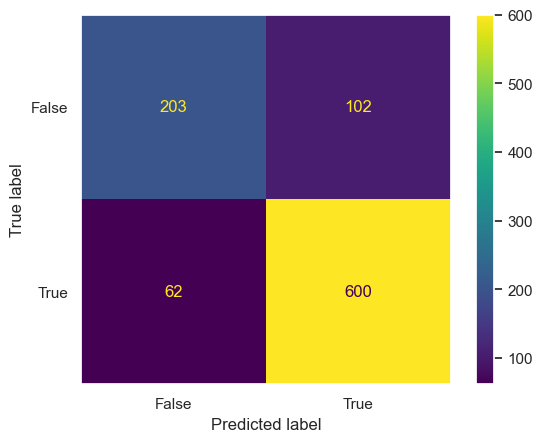

True negative: 203
False postive: 102
False negative: 62
True postive: 600


In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_rf)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_rf).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


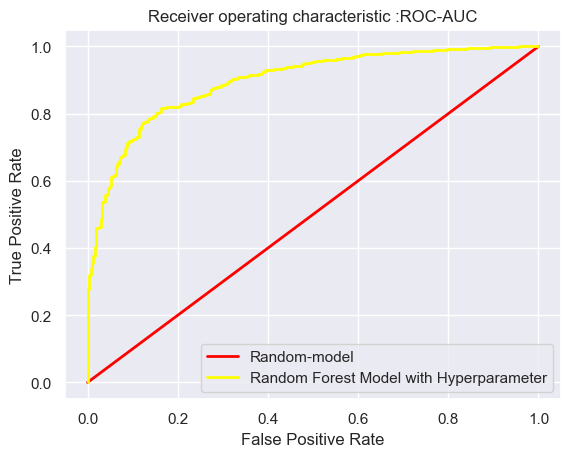

Computed Area Under the Curve (AUC) 0.8969342776484572


In [30]:
y_rf_pred_prob=rf.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_rf_pred_prob)
plt.plot([0,1],[0,1],color="red",lw=2,label="Random-model")
plt.plot(fpr,tpr,color="yellow",lw=2,label="Random Forest Model with Hyperparameter")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))
